In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn import svm

In [36]:
top_200_2020 = pd.read_csv('../data/streams_2020-01-01__2021-01-01.csv')
song_features_2020 = pd.read_csv('../data/song_features_2020-01-01__2021-01-01.csv')
top_200_2020 = top_200_2020.merge(song_features_2020, on=['track_id'])

top_200_2019 = pd.read_csv('../data/streams_2019-01-01__2020-01-01.csv')
song_features_2019 = pd.read_csv('../data/song_features_2019-01-01__2020-01-01.csv')
top_200_2019 = top_200_2019.merge(song_features_2019, on=['track_id'])

top_200_2020 ['popular_during_COVID'] = np.ones(len(top_200_2020))
top_200_2019 ['popular_during_COVID'] = np.zeros(len(top_200_2019))

frames = [top_200_2019, top_200_2020]
top_2019_2020 = pd.concat(frames)

top_2019_2020.head(50)

,Position,Track Name,Artist,Streams,URL,date,region,track_id,energy,liveness,...,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,mode,valence,popular_during_COVID
0,1,"thank u, next",Ariana Grande,3978028,https://open.spotify.com/track/2rPE9A1vEgShuZx...,2019-01-01,Global,2rPE9A1vEgShuZxxzR2tZH,0.647,0.1020,...,0.0658,0.280,0.0,0.724,1,207333,-5.642,1,0.435,0.0
1,2,"thank u, next",Ariana Grande,4275439,https://open.spotify.com/track/2rPE9A1vEgShuZx...,2019-01-02,Global,2rPE9A1vEgShuZxxzR2tZH,0.647,0.1020,...,0.0658,0.280,0.0,0.724,1,207333,-5.642,1,0.435,0.0
2,2,"thank u, next",Ariana Grande,4320260,https://open.spotify.com/track/2rPE9A1vEgShuZx...,2019-01-03,Global,2rPE9A1vEgShuZxxzR2tZH,0.647,0.1020,...,0.0658,0.280,0.0,0.724,1,207333,-5.642,1,0.435,0.0
3,2,"thank u, next",Ariana Grande,4385311,https://open.spotify.com/track/2rPE9A1vEgShuZx...,2019-01-04,Global,2rPE9A1vEgShuZxxzR2tZH,0.647,0.1020,...,0.0658,0.280,0.0,0.724,1,207333,-5.642,1,0.435,0.0
4,2,"thank u, next",Ariana Grande,4194463,https://open.spotify.com/track/2rPE9A1vEgShuZx...,2019-01-05,Global,2rPE9A1vEgShuZxxzR2tZH,0.647,0.1020,...,0.0658,0.280,0.0,0.724,1,207333,-5.642,1,0.435,0.0
5,2,"thank u, next",Ariana Grande,3872308,https://open.spotify.com/track/2rPE9A1vEgShuZx...,2019-01-06,Global,2rPE9A1vEgShuZxxzR2tZH,0.647,0.1020,...,0.0658,0.280,0.0,0.724,1,207333,-5.642,1,0.435,0.0
6,3,"thank u, next",Ariana Grande,4266029,https://open.spotify.com/track/2rPE9A1vEgShuZx...,2019-01-07,Global,2rPE9A1vEgShuZxxzR2tZH,0.647,0.1020,...,0.0658,0.280,0.0,0.724,1,207333,-5.642,1,0.435,0.0
7,3,"thank u, next",Ariana Grande,4282739,https://open.spotify.com/track/2rPE9A1vEgShuZx...,2019-01-08,Global,2rPE9A1vEgShuZxxzR2tZH,0.647,0.1020,...,0.0658,0.280,0.0,0.724,1,207333,-5.642,1,0.435,0.0
8,3,"thank u, next",Ariana Grande,4270395,https://open.spotify.com/track/2rPE9A1vEgShuZx...,2019-01-09,Global,2rPE9A1vEgShuZxxzR2tZH,0.647,0.1020,...,0.0658,0.280,0.0,0.724,1,207333,-5.642,1,0.435,0.0
9,3,"thank u, next",Ariana Grande,4224520,https://open.spotify.com/track/2rPE9A1vEgShuZx...,2019-01-10,Global,2rPE9A1vEgShuZxxzR2tZH,0.647,0.1020,...,0.0658,0.280,0.0,0.724,1,207333,-5.642,1,0.435,0.0


In [37]:
max_pos = top_2019_2020.loc[top_2019_2020.groupby(["Track Name"], sort=False)["Position"].idxmin()]
x = max_pos.drop(top_2019_2020.columns[[0,1, 2, 3, 4, 5, 6, 7, 10, 15, 16, 18, 20]], axis=1)
x

,energy,liveness,speechiness,acousticness,instrumentalness,danceability,loudness,valence
0,0.647,0.1020,0.0658,0.280000,0.000000,0.724,-5.642,0.435
0,0.593,0.1700,0.0976,0.688000,0.000161,0.826,-6.401,0.541
39,0.479,0.0703,0.0466,0.556000,0.000000,0.760,-5.574,0.913
39,0.593,0.1700,0.0976,0.688000,0.000161,0.826,-6.401,0.541
271,0.801,0.0642,0.2280,0.157000,0.000005,0.842,-4.167,0.617
...,...,...,...,...,...,...,...,...
73193,0.924,0.2040,0.0310,0.000972,0.007030,0.707,-2.842,0.919
73196,0.872,0.9540,0.0868,0.334000,0.000000,0.695,-3.650,0.646
73197,0.803,0.1530,0.0797,0.034000,0.000000,0.818,-4.282,0.632
73198,0.813,0.1090,0.0997,0.096800,0.000324,0.690,-5.084,0.704


In [38]:
y = max_pos['popular_during_COVID']
model = svm.SVC(kernel = 'linear')
model.fit(x, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
model.support_vectors_

array([[ 0.647 ,  0.102 ,  0.0658, ...,  0.724 , -5.642 ,  0.435 ],
       [ 0.479 ,  0.0703,  0.0466, ...,  0.76  , -5.574 ,  0.913 ],
       [ 0.801 ,  0.0642,  0.228 , ...,  0.842 , -4.167 ,  0.617 ],
       ...,
       [ 0.872 ,  0.954 ,  0.0868, ...,  0.695 , -3.65  ,  0.646 ],
       [ 0.803 ,  0.153 ,  0.0797, ...,  0.818 , -4.282 ,  0.632 ],
       [ 0.813 ,  0.109 ,  0.0997, ...,  0.69  , -5.084 ,  0.704 ]])

In [40]:
model.n_support_

array([2732, 2733])

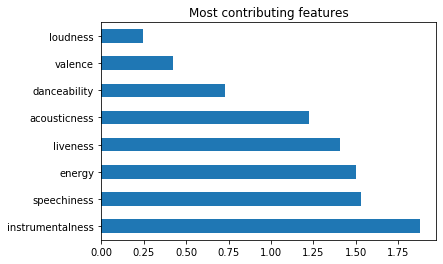

In [41]:
features = ['energy', 'liveness', 'speechiness', 'acousticness', 'instrumentalness', 'danceability', 'loudness', 'valence']
pd.Series(abs(model.coef_[0]), index=features).nlargest(10).plot(kind='barh')
plt.title('Most contributing features')
plt.show()

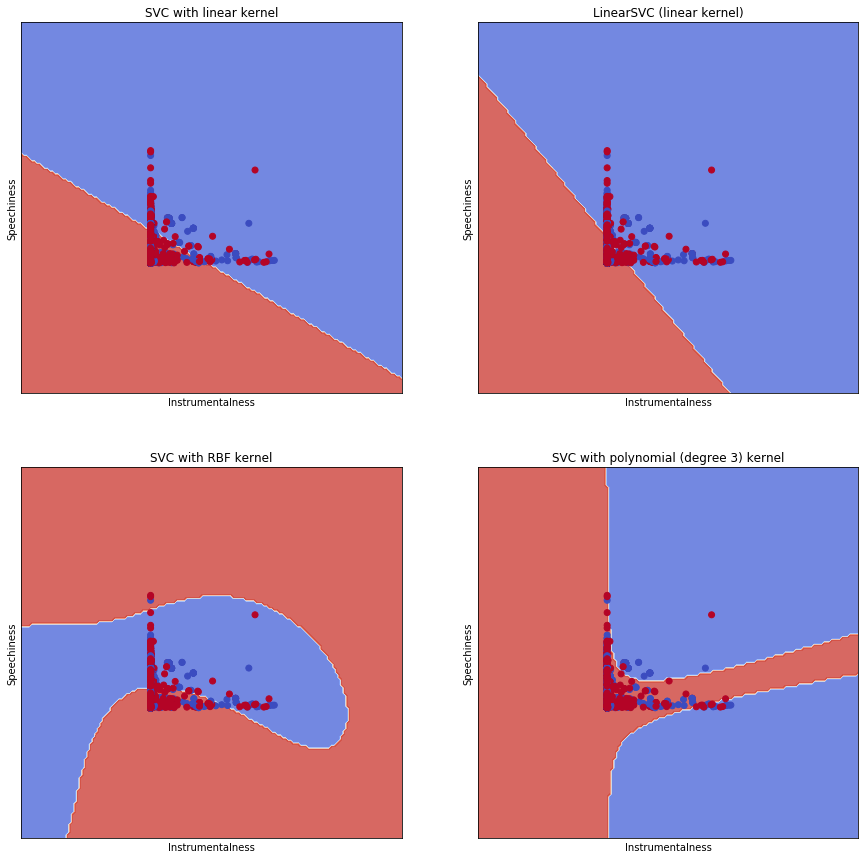

In [42]:
x2 = max_pos[["instrumentalness", "speechiness"]]
y2 = max_pos['popular_during_COVID']

h = .02
C = 20
svc = svm.SVC(kernel='linear', C=C).fit(x2, y2)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(x2, y2)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(x2, y2)
lin_svc = svm.LinearSVC(C=C).fit(x2, y2)

x_min, x_max = x2["instrumentalness"].min() - 1, x2["instrumentalness"].max() + 1
y_min, y_max = x2["speechiness"].min() - 1, x2["speechiness"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

fig = plt.figure(figsize=(15,15))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    
    axs = plt.subplot(2,2,i+1)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(x2["instrumentalness"], x2["speechiness"], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Instrumentalness')
    plt.ylabel('Speechiness')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

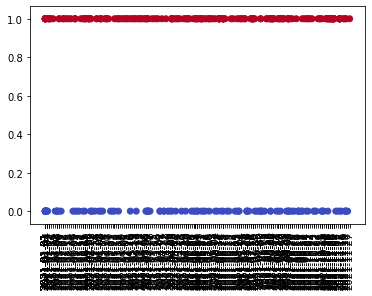

<Figure size 1440x1080 with 0 Axes>

In [33]:
# Prediction using 2021 data

top_200_2021 = pd.read_csv('../data/streams_2021-01-01__2021-12-01.csv')
song_features_2021 = pd.read_csv('../data/song_features_2021-01-01__2021-12-01.csv')
top_200_2021 = top_200_2021.merge(song_features_2021, on=['track_id'])

max_pos = top_200_2021.loc[top_200_2021.groupby(["Track Name"], sort=False)["Position"].idxmin()]
x = max_pos.drop(top_200_2021.columns[[0, 1, 2, 3, 4, 5, 6, 7, 10, 15, 16, 18]], axis=1)

y = model.predict(x)

dates = max_pos['date']
#y = np.c_[ y, dates ]

plt.scatter(dates[::4], y[::4], c=y[::4], cmap=plt.cm.coolwarm)
plt.xticks(dates[::4],  rotation='vertical')
plt.figure(figsize=(20,15))
plt.show()

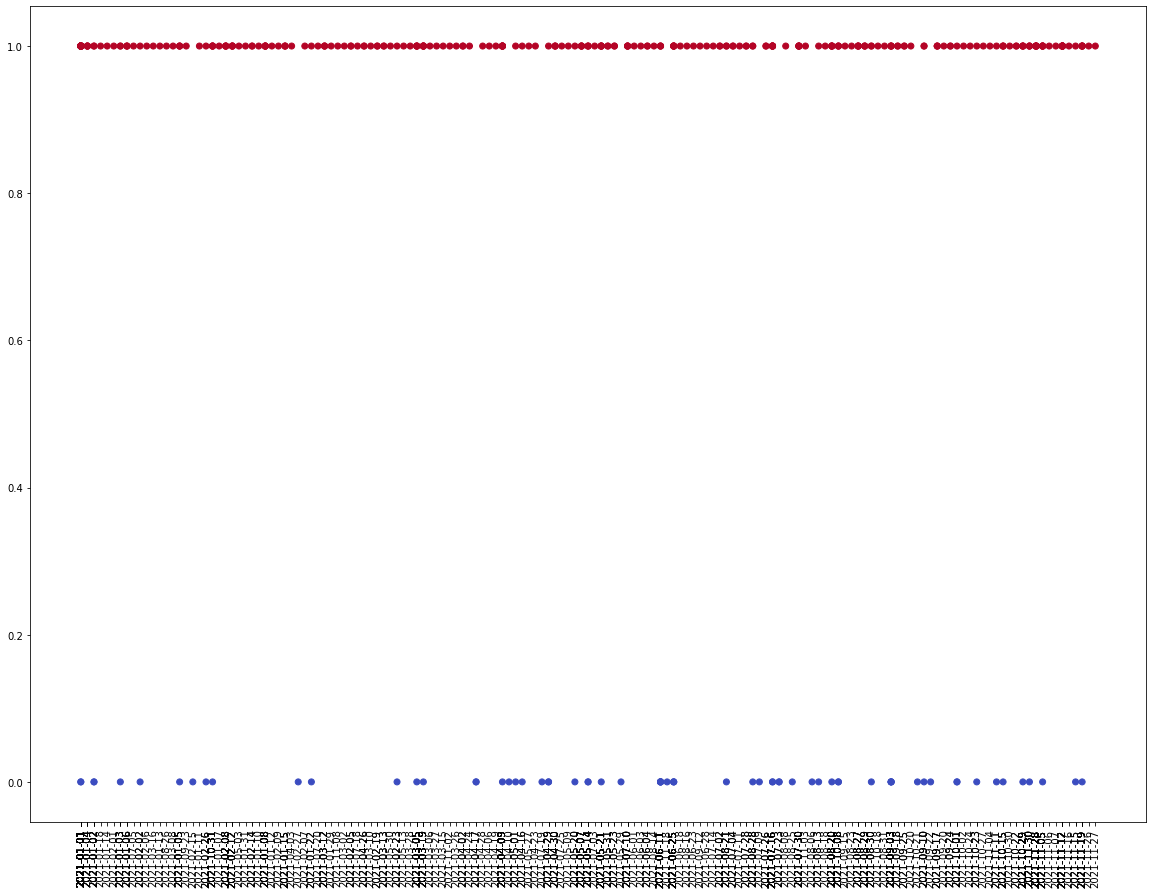

In [45]:
# Prediction using 2021 data

top_200_2021 = pd.read_csv('../data/streams_2021-01-01__2021-12-01.csv')
song_features_2021 = pd.read_csv('../data/song_features_2021-01-01__2021-12-01.csv')
top_200_2021 = top_200_2021.merge(song_features_2021, on=['track_id'])

max_pos = top_200_2021.loc[top_200_2021.groupby(["Track Name"], sort=False)["Position"].idxmin()]
x = max_pos[["instrumentalness", "speechiness"]]

y = rbf_svc.predict(x)

dates = max_pos['date']
plt.figure(figsize=(20,15))
plt.scatter(dates[::4], y[::4], c=y[::4], cmap=plt.cm.coolwarm)
plt.xticks(dates[::4],  rotation='vertical')

plt.show()